In [51]:
import astropy
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

In [52]:
'''dark1 = fits.getdata('DARK1-001.FIT')
dark2 = fits.getdata('DARK1-002.FIT')
dark3 = fits.getdata('DARK1-003.FIT')
masterDark = numpy.median(numpy.dstack((dark1, dark2, dark3)), axis = 2)'''

"dark1 = fits.getdata('DARK1-001.FIT')\ndark2 = fits.getdata('DARK1-002.FIT')\ndark3 = fits.getdata('DARK1-003.FIT')\nmasterDark = numpy.median(numpy.dstack((dark1, dark2, dark3)), axis = 2)"

In [53]:
im1 = fits.getdata('01-1-600s.FIT')
im2 = fits.getdata('01-2-600s.FIT')
im3 = fits.getdata('01-3-600s.FIT')
masterIm = np.median(np.dstack((im1, im2, im3)), axis = 2)

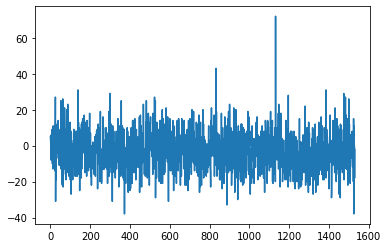

In [54]:
plt.plot(masterIm[900])

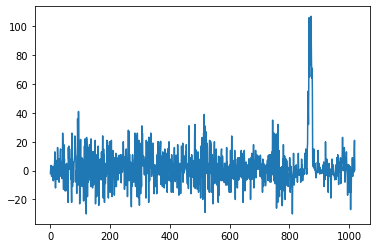

In [55]:
plt.plot(masterIm[:,0])

863


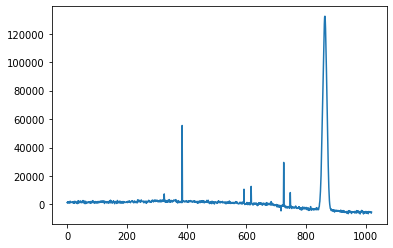

In [56]:
imRowSums = np.sum(masterIm, axis = 1)
plt.plot(imRowSums)
maxInd = np.argmax(imRowSums)
print(maxInd)

In [57]:
from scipy.signal import peak_widths 

In [58]:
fwhm = peak_widths(imRowSums, [np.argmax(imRowSums)])
print(fwhm[2])
print(fwhm[3])

[854.68635219]
[870.77939228]


In [59]:
startInd = int(np.round(fwhm[2]))
endInd = int(np.round(fwhm[3]))


In [60]:
slicedIm = masterIm[startInd : endInd]

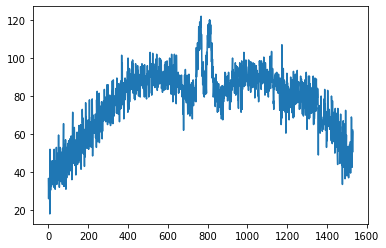

In [61]:
rawSpec = np.median(slicedIm, axis = 0)
plt.plot(rawSpec)

In [62]:
import scipy.optimize as opt

In [63]:
def smooth(rawSpec, lvl):
    smoothSpec = rawSpec.copy()
    smoothOrd = lvl
    for i in range(len(smoothSpec)):
        smoothSpec[i] = np.mean(rawSpec[max(0,i - smoothOrd) : min(len(smoothSpec-1), i + smoothOrd)])
    return smoothSpec

def max(a,b):
    return a if a>=b else b
def min(a,b):
    return b if a>=b else a

In [64]:
type(rawSpec)

numpy.ndarray

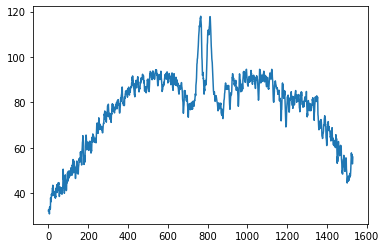

In [65]:
plt.plot(smooth(rawSpec, 3))

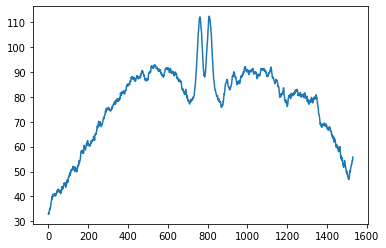

In [66]:
plt.plot(smooth(rawSpec, 10))

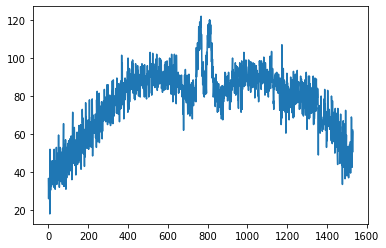

In [67]:
plt.plot(rawSpec)

In [68]:
from scipy.ndimage.filters import gaussian_filter1d

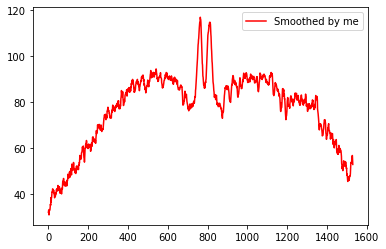

In [69]:
ysmoothed = gaussian_filter1d(rawSpec, sigma=2)

#plt.plot(rawSpec, label = 'Raw')

plt.plot(smooth(rawSpec, 5), label = 'Smoothed by me', color='r')

smoothSpec = smooth(rawSpec, 5)

#plt.plot(ysmoothed, label = 'Gaussian filter')
plt.legend()

In [70]:
plt.plot(spec1d.spectral_axis, spec1d.flux)

NameError: name 'spec1d' is not defined

In [28]:
from specutils.fitting import continuum as cont
fitSpec1d = cont.fit_generic_continuum(spec1d)

NameError: name 'spec1d' is not defined

In [39]:
print(fitSpec1d)

<QuantityModel Chebyshev1D(3, c0=35.00993041, c1=0.15722429, c2=-0.00005961, c3=0.), input_units=Angstrom, return_units=Jy>


In [17]:
def medianSmooth(rawSpec, lvl):
    smoothSpec = rawSpec.copy()
    smoothOrd = lvl
    for i in range(len(smoothSpec)):
        smoothSpec[i] = np.median(rawSpec[max(0,i - smoothOrd) : min(len(smoothSpec-1), i + smoothOrd)])
    return smoothSpec

In [18]:
plt.plot(medianSmooth(rawSpec, 5))

NameError: name 'rawSpec' is not defined

In [206]:
fittedSpecPoly = numpy.polyfit(range(1, len(rawSpec)+1) , rawSpec, 4)
print()fittedSpecPoly

[-8.75615169e-11  2.84379222e-07 -3.82982285e-04  2.47190510e-01
  2.80980221e+01]


In [202]:
m = np.median(rawSpec)
print(m)
rawSpecNorm = rawSpec / m

81.5


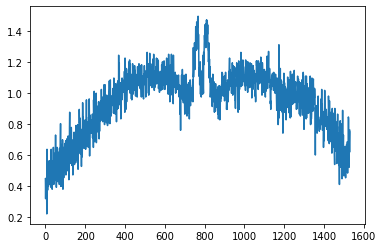

In [203]:
plt.plot(rawSpecNorm)

# This is a polynomial of order <built-in function ord>.


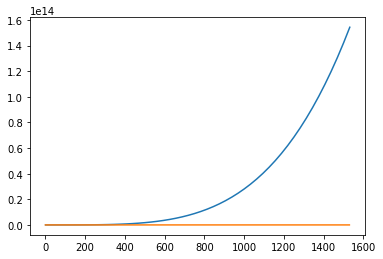

In [205]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

x = np.linspace(1, len(rawSpecNorm) + 1)
plt.plot(x, PolyCoefficients(x, fittedSpecPoly))
plt.plot(rawSpec)
plt.show()

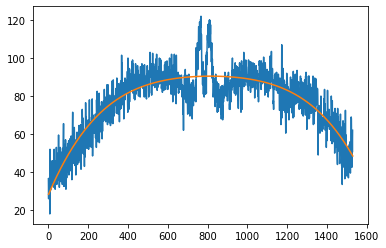

In [214]:
x = np.linspace(1,len(rawSpec),len(rawSpec))
y = [np.polyval(fittedSpecPoly, i) for i in x]
plt.plot(rawSpec)
plt.plot(x,y)


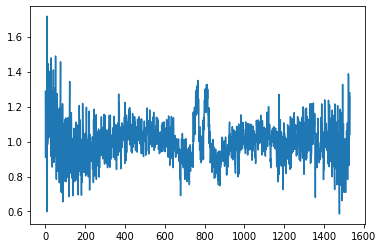

In [215]:
veryMuchCoolSpec = rawSpec / y
plt.plot(veryMuchCoolSpec)

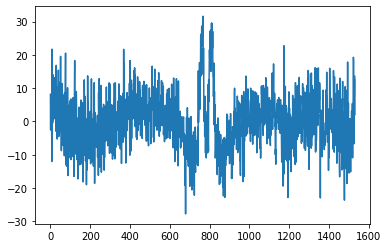

In [216]:
veryMuchCoolSpec = rawSpec - y
plt.plot(veryMuchCoolSpec)

In [223]:
smoothSpec = smooth(rawSpec, 5)
fittedSmoothSpecPoly = numpy.polyfit(range(1, len(smoothSpec)+1) , smoothSpec, 5)

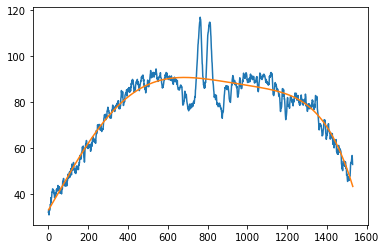

In [224]:
x = np.linspace(1,len(smoothSpec),len(smoothSpec))
y = [np.polyval(fittedSmoothSpecPoly, i) for i in x]
plt.plot(smoothSpec)
plt.plot(x,y)

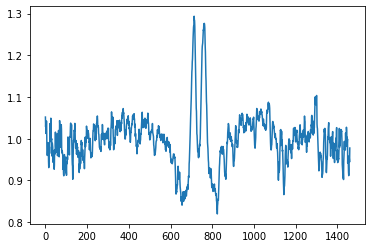

In [234]:
veryMuchCoolSmoothSpec = smoothSpec / y
plt.plot(veryMuchCoolSmoothSpec[50:1510])

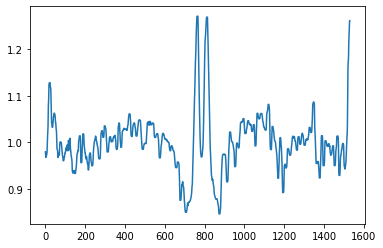

In [232]:
plt.plot(medianSmooth(veryMuchCoolSmoothSpec, 5))